In [24]:
# import the libraries

import yfinance as yf
import pandas as pd

NVIDA_Data = yf.download('NVDA', start="2025-04-21", end="2025-05-02")
# seletcing the features and target
# 'Open', 'High', 'Low', 'Close','Volume' 
NVIDA_Features = ['Open', 'High', 'Low', 'Close', 'Volume']
NVIDA_Data = NVIDA_Data[NVIDA_Features]
NVIDA_Price = NVIDA_Data['Close']
# Displying NVIDA Historical Data
NVIDA_Data.head()

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-04-21,98.769997,99.440002,95.040001,96.910004,288501100
2025-04-22,98.779999,99.809998,97.279999,98.889999,241004800
2025-04-23,104.519997,104.800003,102.019997,102.709999,247526000
2025-04-24,103.480003,106.540001,103.110001,106.430000,220815000
2025-04-25,106.849998,111.919998,105.730003,111.010002,251064700


In [25]:
# importing train_test_split
from sklearn.model_selection import train_test_split
# Creating a training and testing set

NVIDA_Data_train, NVIDA_Data_test, NVIDA_Price_train, NVIDA_Price_test = train_test_split(NVIDA_Data, NVIDA_Price, random_state=1)

In [26]:
# importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# creating NVIDA model
NVIDA_model = RandomForestRegressor(n_estimators=100, random_state=50)
# fitting the model
NVIDA_model.fit(NVIDA_Data_train, NVIDA_Price_train)
NVIDA_predictions = NVIDA_model.predict(NVIDA_Data_test)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [27]:
 # importing mean_absolute_error
from sklearn.metrics import mean_absolute_error
NVIDA_mae = mean_absolute_error(NVIDA_predictions, NVIDA_Price_test)
# displaying the mean absolute error
print("Mean absolute error for NVIDA model: {:.2f}".format(NVIDA_mae))

Mean absolute error for NVIDA model: 1.82


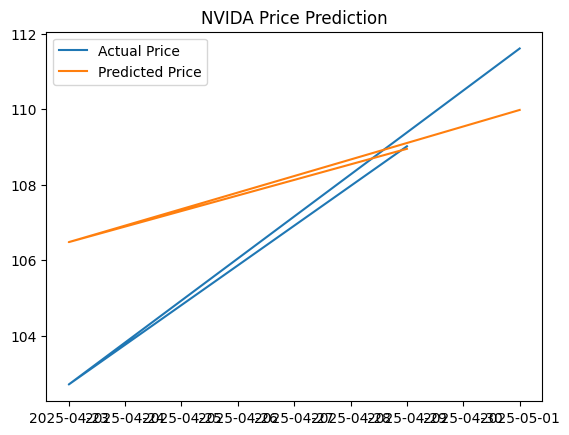

In [28]:
# predicting the price
import matplotlib.pyplot as plt
plt.plot(NVIDA_Data_test.index, NVIDA_Price_test, label='Actual Price')
plt.plot(NVIDA_Data_test.index, NVIDA_predictions, label='Predicted Price')
plt.title('NVIDA Price Prediction')
plt.legend()
plt.show()